#数据定制(搜集-清洗-挖掘-视图化)案例

##步骤2、3、4:清洗-挖掘-视图化

对于一份有价值的数据，我们首先要清洗它，剔除错误的数据条，规避干扰信息，这样才能使后续的挖掘工作顺利展开。

In [1]:
import pandas as pd #导入 pandas 数据分析库

df = pd.read_csv('/Users/chengang/Desktop/merged_data.csv',error_bad_lines=False,low_memory=False)# 导入 csv 数据，忽略错误行
df.to_csv("/Users/chengang/Desktop/merged_data1.csv")# 保存清洗后的数据到 csv 文件

上面两行代码就是一个最基本的清洗过程：首先导入数据并剔除错误条目，在本案例中，主要就是剔除列数错误的数据条，然后将清洗好的数据重新导入一个CSV文本。

干净的数据就位之后，接下来就是准备数据分析环境了。

In [22]:
#coding=utf8

import numpy as np #导入 numpy 数学分析库
import matplotlib # 导入 matplotlib 数学图像化库
import matplotlib.pyplot as plt # 导入图像生成器
from matplotlib import font_manager # 导入字体管理器
from matplotlib import rcParams # 导入 matplotlib 参数设置器

#导入notebook图像显示交互环境（#不可写在%号后面）
%matplotlib inline

本案例的数据分析环境，主要是 pandas 数据分析库, 同时依赖 numpy, matplotlib, ipython 三个第三方库。

pandas 是主要数据分析模块；    
numpy 是数学计算的模块；   
matplotlib 是数学图像化输出的模块；   
Ipython 的 notebook 模式负责输入输入的整合显示；   

值得一提的是，Ipython notebook 可以将程序的输入(In)和程序的输出(Out)动态、顺序的显示在浏览器中，用 %matplotlib inline 语句将程序调用 matplotlib 所生成的视图也内嵌在浏览器(Out)输出的内容中。另外 Ipython notebook 的 .ipynb 格式文件直接以 json 和 base64 编码保存所有输入输出为一个单独的文件，而这一文件格式在 Github 也得到了[完美的支持](http://blog.jupyter.org/2015/05/07/rendering-notebooks-on-github/)。

下面是一些数据分析的基本操作。

In [33]:
#print df.head() #查看文件标头
#df.tail()       #查看文件末尾
#df.describe()   #查看文件描述
#df.index        #查看数据索引
#df.values       #查看数据值

#df.iloc[:,-2]                                #定位到所有行的倒数第2列
#df.iloc[:,-2].value_counts()                 #统计此列所有值
#df.iloc[:,-2].value_counts().plot()          #图形化显示
#df.iloc[:,-2].value_counts().plot(kind='bar')#设定图形形状柱形图
#df.iloc[:,-2].value_counts().plot(kind='bar').get_figure().savefig('/Users/chengang/Desktop/tt.pdf')#保存图片
#df.iloc[:,-2].value_counts().hist()          #直方图

#一下三行代码测试生成随机散列图，来检查数据的重复状况，颜色越浓说明数据重复越高。
# dates = pd.date_range('20150101', periods= 300)#生成随机Series
# df1 = pd.DataFrame(np.random.randn(300,4), index=dates, columns=list('ABCD'))#生成随机DataFrame
# df1.plot(kind='scatter',x='A', y='B', alpha=0.3)#生成散列图，查看数据重复状况，alpha设定透明度。

我们搜集的是案列网站2006年3月至2015年5月100万的随机任务记录，占该网站总任务量600万的六分之一，因此我们认为这是一个具有代表性的数据源。
鉴于这是一个任务悬赏式的网站，雇主首先贴出要求，竞标者出方案接标。因此我们首先关注一下这100万交易的成功比例。

（注：100万任务中，有近一半在案例网站被清除，因此有效记录为50万）

In [6]:
df.iloc[:,2].value_counts().iloc[0:2]

未成交    432244
已成交    112838
dtype: int64

以上代码统计了数据中已成交和未成交项目的数量，分别为112838和432244，这是两个抽象的数字，数字的分析可以止步于此。然而在大数据的时代，关键的一步是让数据直观起来，将复杂的信息浓缩简化成我们的大脑可以立刻掌握的形式，这就是数据视图化(Data visualisation)的魅力所在，那么让我们直观地体验一下数据视图化的表现力。

按照上述统计结果生成饼状图的代码如下：

In [7]:
matplotlib.matplotlib_fname()#find config file on the system

'/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mpl-data/matplotlibrc'

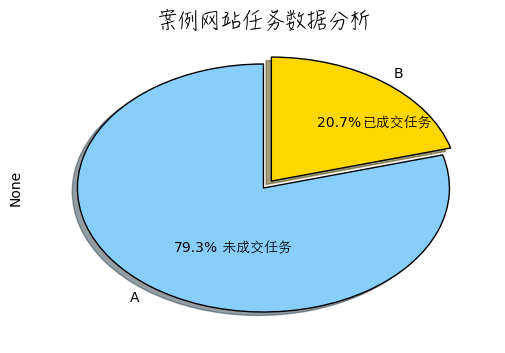

In [17]:
rcParams['savefig.dpi']=100#设定图片的DPI

# font = {'family' : 'Hanzipen',
#         'weight' : 'bold',
#         }
# matplotlib.rc('font', **font)  # pass in the font dict as kwargs #设定matplotlib全局字体，对中文好像无效。

zhfont1= font_manager.FontProperties(fname='/Library/Fonts/Lantinghei.ttc')#设定中文字体
zhfont2= font_manager.FontProperties(fname='/Library/Fonts/Hanzipen.ttc')
zhfont3= font_manager.FontProperties(fname='/Library/Fonts/Yuanti.ttc')
plt.title(u'案例网站任务数据分析',size=15,fontproperties=zhfont2)#指定字体
plt.text(0.54,0.50,u"已成交任务",fontproperties='STHeiti',size=10) 
plt.text(-0.24,-0.51,u" 未成交任务",fontproperties='STHeiti',size=10) 
#'yellowgreen', 'gold', 'lightskyblue', 'lightcoral'#可用的饼图颜色
df.iloc[:,2].value_counts().iloc[0:2].plot(kind='pie',labels= [u'A','B'],explode= (0, 0.07,),colors=['lightskyblue', 'gold'],shadow=True,autopct='%0.1f%%', startangle=90);#设定图形形状柱形图

可以看到图中黄色部分代表已成交的任务，占总任务的 1/5 左右。也就是说，有百分之八十的任务是不了了之了。

我们很好奇这成交的任务中，到底有多少钱被投标者赚到，因此让我们统计一下这已成交任务中，排名前20的交易额。

In [9]:
df.iloc[:,3].value_counts().iloc[2:22]

￥100.00     12477
￥300.00      6003
￥200.00      5932
￥500.00      5424
￥400.00      5301
￥1.00        5229
￥10.00       4510
￥50.00       4439
￥99.00       3486
￥1000.00     3016
￥600.00      2000
￥150.00      1856
￥800.00      1618
￥260.00      1511
￥20.00       1420
￥2000.00     1260
￥5.00        1243
￥60.00       1179
￥1500.00     1156
￥80.00       1124
dtype: int64

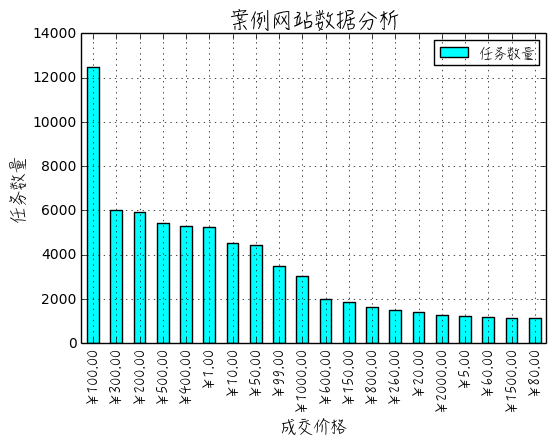

In [11]:
rcParams['savefig.dpi']=100#设定图片的DPI
#plt.title(u'逗你玩威客网站数据分析',size=15,fontproperties='STHeiti')#直接指定字体

fig = plt.figure()#定义一个图片
ax = fig.add_subplot(111)#划分1行1列选第1块。  
x = ax.xaxis#获取 x 轴坐标
y = ax.yaxis#获取 y 轴坐标
xmajorLocator = matplotlib.ticker.MultipleLocator(1)#设定主 X 轴间隔为1的倍数
x.set_major_locator(xmajorLocator)
ax.set_xticklabels('abcdefg',fontproperties=zhfont2)#设定 X 轴坐标标签

df.iloc[:,3].value_counts().iloc[2:22].plot(kind = 'bar',color=(0,1,1))#图形化显示，选定RGB颜色，选定标记为点
plt.title(u'案例网站数据分析',fontproperties=zhfont2,size=15)#设定图片标头及其属性
#plt.text(2,5,u"北国风光",fontproperties=zhfont2,size=15)#设定图片内显示文本
plt.xlabel(u'成交价格',fontproperties=zhfont2,size=12)#设定横轴名称
plt.ylabel(u'任务数量',fontproperties=zhfont2,size=12)#设定纵轴名称
plt.legend((u'任务数量',), loc='upper right',prop=zhfont2)#设定图素标

可以看到成交价格为100元的任务数量达到了12000个左右，占第一名，之后就是300元与200元的各6000个左右。 也就是说，前三甲的成交价格都不超过300元。

再来看看到底有哪些任务是比较多的。

In [317]:
df.iloc[:,9].value_counts().iloc[1:22]

LOGO设计    59228
网站制作      18671
推广注册      18084
论坛推广      15973
网络营销推广    13908
淘宝店铺推广    13495
桌面软件      10605
需求市场      10513
网页设计      10423
QQ群推广      9850
SEO        8601
其他软件开发     7488
品牌起名       7148
其他网络推广     6923
网络推广       5154
网店收藏分享     5139
公司起名       4438
APP推广      4362
产品包装设计     4215
商品图片处理     3103
宣传册设计      3088
dtype: int64

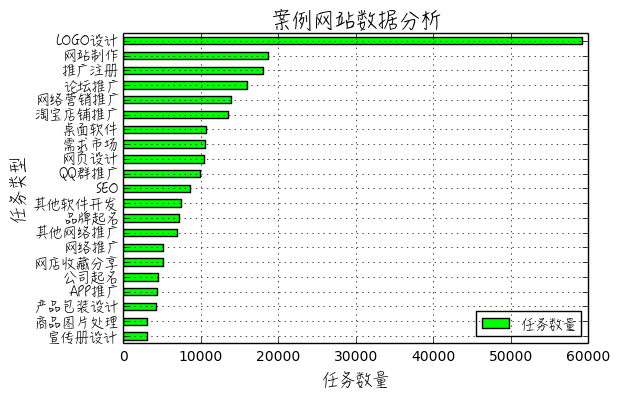

In [20]:
rcParams['savefig.dpi']=100#设定图片的DPI
#plt.title(u'逗你玩威客网站数据分析',size=15,fontproperties='STHeiti')#直接指定字体

fig = plt.figure()#定义一个图片
ax = fig.add_subplot(111)#划分1行1列选第1块。  
# x = ax.xaxis#获取 x 轴坐标
# y = ax.yaxis#获取 y 轴坐标
xmajorLocator = matplotlib.ticker.MultipleLocator(1)#设定主 X 轴间隔为1的倍数
# x.set_major_locator(xmajorLocator)
ax.set_yticklabels('abcdefg',fontproperties=zhfont2)#设定 X 轴坐标标签
#order重新排列
df.iloc[:,9].value_counts().iloc[1:22].order(ascending=True).plot(kind = 'barh',color=(0,1,0))# barh 水平柱状图图形化显示，选定RGB颜色，选定标记为点
plt.title(u'案例网站数据分析',fontproperties=zhfont2,size=15)#设定图片标头及其属性
#plt.text(2,5,u"北国风光",fontproperties=zhfont2,size=15)#设定图片内显示文本
plt.xlabel(u'任务数量',fontproperties=zhfont2,size=12)#设定横轴名称
plt.ylabel(u'任务类型',fontproperties=zhfont2,size=12)#设定纵轴名称
plt.legend((u'任务数量',), loc='lower right',prop=zhfont2)#设定图素标

可以看到，Logo 设计达到了60000左右，名列第一；  
第二名的是网站制作，达到了18000左右的数量；  
第三第四第五第六可以统括为推广类的任务，总共6万左右。  

我们想知道，这些发布任务的雇主，都是来自什么地方，首先统计一下雇主区域分布，代码如下：

In [71]:
df.iloc[:,-2].value_counts().iloc[1:20]#统计各区域任务数量排名前20

浙江    796
广东    786
深圳    472
广州    374
长沙    294
上海    217
北京    212
杭州    199
烟台    189
武汉    187
江苏    185
重庆    179
东莞    161
福建    161
成都    128
山东    128
苏州     97
厦门     96
四川     88
dtype: int64

看视图：

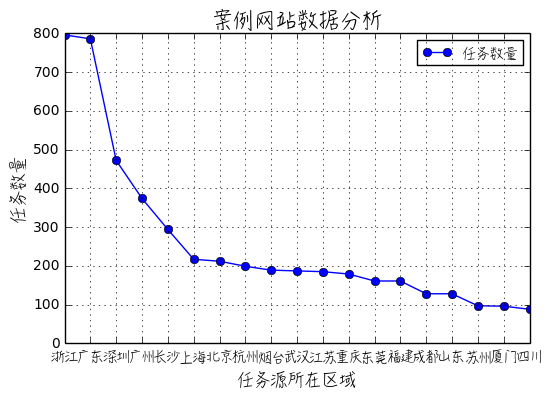

In [21]:
rcParams['savefig.dpi']=100#设定图片的DPI
#plt.title(u'逗你玩威客网站数据分析',size=15,fontproperties='STHeiti')#直接指定字体

fig = plt.figure()#定义一个图片
ax = fig.add_subplot(111)#划分1行1列选第1块。  
x = ax.xaxis#获取 x 轴坐标
y = ax.yaxis#获取 y 轴坐标
xmajorLocator = matplotlib.ticker.MultipleLocator(1)#设定主 X 轴间隔为1的倍数
x.set_major_locator(xmajorLocator)
ax.set_xticklabels('abcdefg',fontproperties=zhfont2)#设定 X 轴坐标标签

df.iloc[:,-2].value_counts().iloc[1:20].plot(color=(0,0,1),marker='o')#图形化显示，选定RGB颜色，选定标记为点
plt.title(u'案例网站数据分析',fontproperties=zhfont2,size=15)#设定图片标头及其属性
#plt.text(2,5,u"北国风光",fontproperties=zhfont2,size=15)#设定图片内显示文本
plt.xlabel(u'任务源所在区域',fontproperties=zhfont2,size=12)#设定横轴名称
plt.ylabel(u'任务数量',fontproperties=zhfont2,size=12)#设定纵轴名称
plt.legend((u'任务数量',), loc='upper right',prop=zhfont2)#设定图素标




浙江，广东，深圳成为了前三甲，由此可见雇主以南方省份居多。那么我们还想进一步探究到底是哪些城市发布需求较为频繁，代码如下：

In [73]:
df.iloc[:,-1].value_counts().iloc[1:20]#统计各城市任务数量排名前20

温州    545
深圳    209
广州    173
东莞     95
杭州     85
成都     59
武汉     57
厦门     55
南京     51
苏州     51
宁波     42
福州     42
嘉兴     40
郑州     39
金华     34
汕头     31
青岛     29
长沙     28
韶关     27
dtype: int64

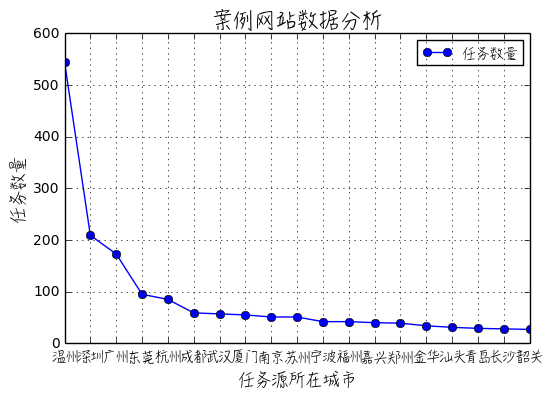

In [273]:
fig = plt.figure()#定义一个图片
ax = fig.add_subplot(111)#划分1行1列选第1块。  
x = ax.xaxis#获取x,y轴坐标
y = ax.yaxis
xmajorLocator = matplotlib.ticker.MultipleLocator(1)#设定主 X 轴间隔为1的倍数
x.set_major_locator(xmajorLocator)
ax.set_xticklabels('abcdefg',fontproperties=zhfont2)#设定 X 轴坐标标签

df.iloc[:,-1].value_counts().iloc[1:20].plot(color=(0,0,1),marker='o')#图形化显示，选定RGB颜色，选定标记为点

plt.title(u'案例网站数据分析',fontproperties=zhfont2,size=15)
#plt.text(0.5,0.5,u"北国风光",fontproperties=zhfont2,size=30) 
plt.xlabel(u'任务源所在城市',fontproperties=zhfont2,size=12)
plt.ylabel(u'任务数量',fontproperties=zhfont2,size=12)
plt.legend((u'任务数量',), loc='upper right',prop=zhfont2)

温州，这个来自浙江的城市，以545个任务超过第二名深圳两倍的数量名列第一。

最后，让我们看看案例网站数据中第一条任务发布记录吧：

In [340]:
df.loc[0]

Unnamed: 0                                                  458
Unnamed: 1                                           案例网站LOGO设计
Unnamed: 2                                                  未成交
Unnamed: 3                                                    /
Unnamed: 4                                                    /
编号                                                       500.00
项目名称                                      需求市场>LOGO/VI设计>LOGO设计
成交与否                                                       需求市场
成交价                                                   LOGO/VI设计
中标方                                                      LOGO设计
预算                                                            /
任务类型                                                          /
类型层1                                                         比稿
类型层2                                                    一人独享该赏金
类型层3                                                  实名认证 手机认证
类型层4                                    

In [274]:
#面向对象的视图化思维
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# fig    = Figure()
# canvas = FigureCanvas(fig)
# ax     = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# line,  = ax.plot([0,1], [0,1])
# ax.set_title("a straight line (OO)")
# ax.set_xlabel("x value")
# ax.set_ylabel("y value")
# #canvas.print_figure('/Users/chengang/Desktop/demo.pdf')